<a href="https://colab.research.google.com/github/mitinull/polyp-segmentation-AI-Project-/blob/main/polyp_segm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import random
import cv2

import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

# Dataset Familiarization

In [3]:
# Define directories of images and masks

IMGS_DIR = './drive/MyDrive/Kvasir-SEG/images/'
MSKS_DIR = './drive/MyDrive/Kvasir-SEG/masks/'

In [4]:
# Generate full path for all images and masks
# Sort paths to make coresponding images and mask

imgs_paths = [IMGS_DIR + filename for filename in sorted(os.listdir(IMGS_DIR))]
msks_paths = [MSKS_DIR + filename for filename in sorted(os.listdir(MSKS_DIR))]
print(imgs_paths[:3])
print(msks_paths[:3])

['./drive/MyDrive/Kvasir-SEG/images/cju0qkwl35piu0993l0dewei2.jpg', './drive/MyDrive/Kvasir-SEG/images/cju0qoxqj9q6s0835b43399p4.jpg', './drive/MyDrive/Kvasir-SEG/images/cju0qx73cjw570799j4n5cjze.jpg']
['./drive/MyDrive/Kvasir-SEG/masks/cju0qkwl35piu0993l0dewei2.jpg', './drive/MyDrive/Kvasir-SEG/masks/cju0qoxqj9q6s0835b43399p4.jpg', './drive/MyDrive/Kvasir-SEG/masks/cju0qx73cjw570799j4n5cjze.jpg']


In [5]:
# Generate a random index

img_idx = random.randint(0, len(imgs_paths) - 1)
img_idx

486

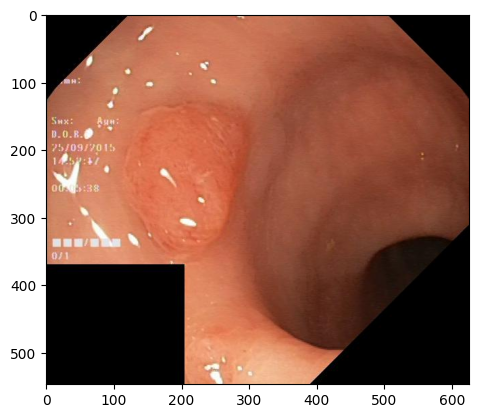

In [6]:
# Read an image and show it

# Read the image using OpenCV
img = cv2.imread(imgs_paths[img_idx])

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.show()


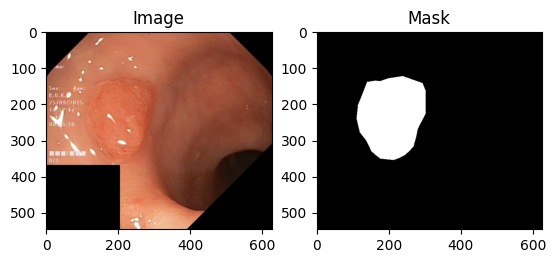

In [7]:
# Show the image and its mask together

# Read the corresponding mask
msk = cv2.imread(msks_paths[img_idx], 0)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Display the image in the first subplot
ax1.imshow(img_rgb)
ax1.set_title('Image')

# Display the mask in the second subplot
ax2.imshow(msk, cmap='gray')
ax2.set_title('Mask')

# Show the figure
plt.show()


# Train-Validation-Test Split

In [8]:
# Split the data into train, validation, and test sets

imgs_paths_train, imgs_paths_valtest, msks_paths_train, msks_paths_valtest = train_test_split(imgs_paths, msks_paths, test_size=0.2, random_state=42)
imgs_paths_val, imgs_paths_test, msks_paths_val, msks_paths_test = train_test_split(imgs_paths_valtest, msks_paths_valtest, test_size=0.5, random_state=42)

print(f"imgs_train: {len(imgs_paths_train)}")
print(f"msks_train: {len(msks_paths_train)}")
print(f"imgs_val: {len(imgs_paths_val)}")
print(f"msks_val: {len(msks_paths_val)}")
print(f"imgs_test: {len(imgs_paths_test)}")
print(f"msks_test: {len(msks_paths_test)}")

imgs_train: 800
msks_train: 800
imgs_val: 100
msks_val: 100
imgs_test: 100
msks_test: 100


# Load Data

In [9]:
# Read the images and masks

imgs_train = [cv2.imread(path) for path in tqdm(imgs_paths_train)]
msks_train = [cv2.imread(path, 0) for path in tqdm(msks_paths_train)]

imgs_val = [cv2.imread(path) for path in tqdm(imgs_paths_val)]
msks_val = [cv2.imread(path, 0) for path in tqdm(msks_paths_val)]

imgs_test = [cv2.imread(path) for path in tqdm(imgs_paths_test)]
msks_test = [cv2.imread(path, 0) for path in tqdm(msks_paths_test)]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [10]:
np.unique(msks_test[8])

array([  0,   1,   2,   3,   4,   5,   6,   7, 248, 249, 250, 251, 252,
       253, 254, 255], dtype=uint8)

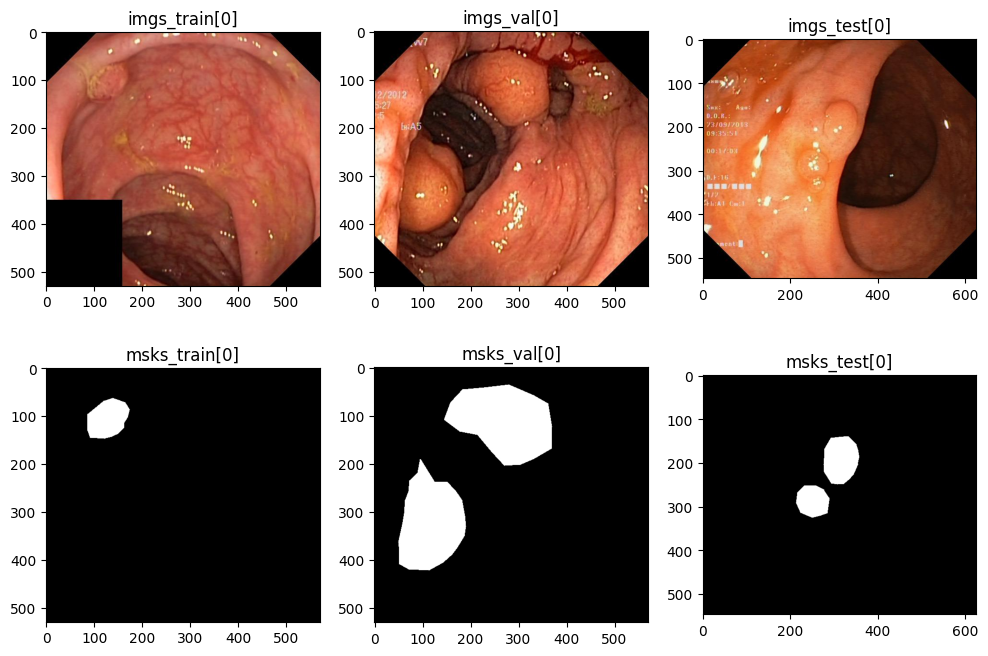

In [11]:
# Create a figure with 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot the first image from each list
axs[0, 0].imshow(cv2.cvtColor(imgs_train[0], cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('imgs_train[0]')


axs[0, 1].imshow(cv2.cvtColor(imgs_val[0], cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('imgs_val[0]')

axs[0, 2].imshow(cv2.cvtColor(imgs_test[0], cv2.COLOR_BGR2RGB))
axs[0, 2].set_title('imgs_test[0]')

axs[1, 0].imshow(msks_train[0], cmap='gray')
axs[1, 0].set_title('msks_train[0]')

axs[1, 1].imshow(msks_val[0], cmap='gray')
axs[1, 1].set_title('msks_val[0]')


axs[1, 2].imshow(msks_test[0], cmap='gray')
axs[1, 2].set_title('msks_test[0]')

# Show the figure
plt.show()


# Preprocessing

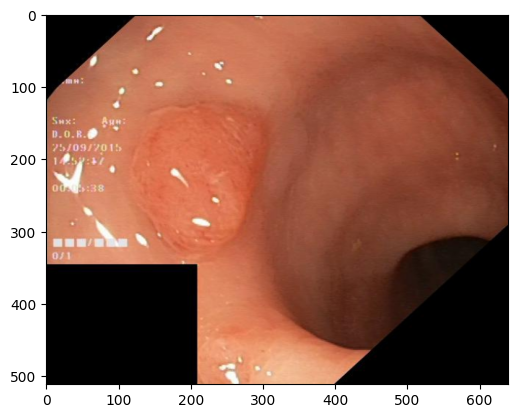

In [12]:
# Regarding to the article re-scaled to 640 × 512,
# which respects the predominant rectangular aspect ratio
# in most polyp segmentation datasets

IMG_WIDTH = 640
IMG_HEIGHT = 512

resized_img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))

plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
# Apply resize function to all lists

imgs_train = [cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)) for img in tqdm(imgs_train)]
msks_train = [cv2.resize(msk, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_NEAREST) for msk in tqdm(msks_train)]

imgs_val = [cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)) for img in tqdm(imgs_val)]
msks_val = [cv2.resize(msk, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_NEAREST) for msk in tqdm(msks_val)]

imgs_test = [cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)) for img in tqdm(imgs_test)]
msks_test = [cv2.resize(msk, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_NEAREST) for msk in tqdm(msks_test)]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [14]:
# Convert masks lists to binary (zero and one)

msks_train = [(msk > 127).astype(np.uint8) for msk in tqdm(msks_train)]
msks_val = [(msk > 127).astype(np.uint8) for msk in tqdm(msks_val)]
msks_test = [(msk > 127).astype(np.uint8) for msk in tqdm(msks_test)]


  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [15]:
# Print shape of images inside each list

print(f"shape of images in imgs_train: {imgs_train[0].shape}")
print(f"shape of images in msks_train: {msks_train[0].shape}")
print(f"shape of images in imgs_val: {imgs_val[0].shape}")
print(f"shape of images in msks_val: {msks_val[0].shape}")
print(f"shape of images in imgs_test: {imgs_test[0].shape}")
print(f"shape of images in msks_test: {msks_test[0].shape}")


shape of images in imgs_train: (512, 640, 3)
shape of images in msks_train: (512, 640)
shape of images in imgs_val: (512, 640, 3)
shape of images in msks_val: (512, 640)
shape of images in imgs_test: (512, 640, 3)
shape of images in msks_test: (512, 640)


In [16]:
np.unique(msks_train[12])

array([0, 1], dtype=uint8)

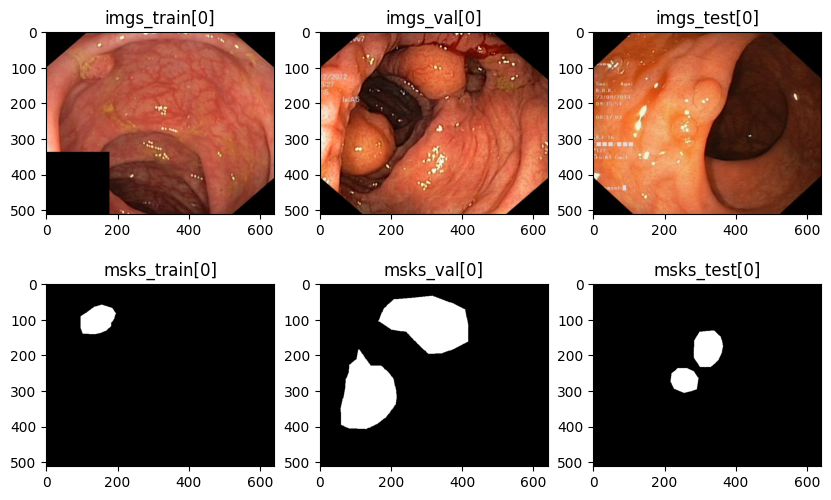

In [17]:
# Create a figure with 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

# Plot the first image from each list
axs[0, 0].imshow(cv2.cvtColor(imgs_train[0], cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('imgs_train[0]')


axs[0, 1].imshow(cv2.cvtColor(imgs_val[0], cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('imgs_val[0]')

axs[0, 2].imshow(cv2.cvtColor(imgs_test[0], cv2.COLOR_BGR2RGB))
axs[0, 2].set_title('imgs_test[0]')

axs[1, 0].imshow(msks_train[0], cmap='gray')
axs[1, 0].set_title('msks_train[0]')

axs[1, 1].imshow(msks_val[0], cmap='gray')
axs[1, 1].set_title('msks_val[0]')


axs[1, 2].imshow(msks_test[0], cmap='gray')
axs[1, 2].set_title('msks_test[0]')

# Show the figure
plt.show()

# Model Selection and Implementation (U-Net)

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
# prompt: define a unet model suitable for polyp segmentation

def unet_model(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), num_classes=1):
    inputs = keras.Input(shape=input_shape)

    c1 = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = layers.Dropout(0.1)(c1)
    c1 = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = layers.Dropout(0.1)(c2)
    c2 = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = layers.Dropout(0.2)(c3)
    c3 = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = layers.Dropout(0.2)(c4)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    c5 = layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = layers.Dropout(0.3)(c5)
    c5 = layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    u6 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = layers.Dropout(0.2)(c6)
    c6 = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = layers.Dropout(0.2)(c7)
    c7 = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = layers.Dropout(0.1)(c8)
    c8 = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1], axis=3)
    c9 = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = layers.Dropout(0.1)(c9)
    c9 = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = keras.Model(inputs=[inputs], outputs=[outputs])
    return model


In [20]:
model = unet_model()

1/1 [==============================] - 2s 2s/step


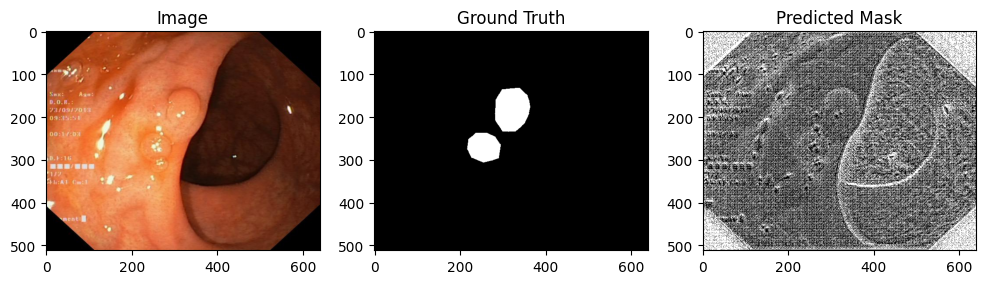

In [21]:
# Predict an image before training to see if model is working

image = imgs_test[0]
mask = msks_test[0]

# Predict the mask
predicted_mask = model.predict(np.expand_dims(image, axis=0))[0]

# Convert the predicted mask to a showable image
predicted_mask = np.where(predicted_mask > 0.5, 1, 0)

# Show the image, ground truth, and predicted mask
plt.figure(figsize=(12, 8))

# Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image')

# Ground truth
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Ground Truth')

# Predicted mask
plt.subplot(1, 3, 3)
plt.imshow(predicted_mask, cmap='gray')
plt.title('Predicted Mask')

plt.show()


In [22]:
np.unique(predicted_mask)

array([0, 1])

# Training and Validation

In [23]:
# Compile unet_model using Intersection over Union

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
print(np.array(imgs_train).shape)
print(np.array(msks_train).shape)

(800, 512, 640, 3)
(800, 512, 640)


In [ ]:
# prompt: train model

history = model.fit(
    np.array(imgs_train),
    np.array(msks_train),
    batch_size=16,
    epochs=1,
    validation_data=(np.array(imgs_val), np.array(msks_val)),
    verbose=1,
)
